# Предобработка исходного файла `Uber Data Analysis` в рамках "Ретрит FineBI: Второе дыхание"

## Источник данных:

Kaggle - Uber Data
[ссылка](https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis/data)

## Описание данных:

Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL (shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled, time spent on the trip, and demand at the time of the request.

Uber has gained popularity for its convenience, ease of use, and competitive pricing compared to traditional taxi services. It has expanded its operations to numerous cities around the world and has also introduced other services like food delivery (Uber Eats) and package delivery (Uber Connect).

## Обоснование выбора Python для предобработки:
В рамках данного проекта был использован Python для предобработки данных, поскольку в исходном файле были некорретно отображены даты начала и окончания заказов, в части строк формат представлял `d-m-Y H:M`, в части `m/d/Y H:M`. Библиотека pandas обладает достаточной мощностью и инструментами для быстрого смена форматов и приведения их к общему виду.

## Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеки
import pandas as pd

!pip install missingno -q
import missingno as msno

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt

In [2]:
# Выгружаем данные в переменные 
df = pd.read_csv(r"C:\Users\Mary\Downloads\UberDataset.csv")

# Выводим 5 первых строк
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


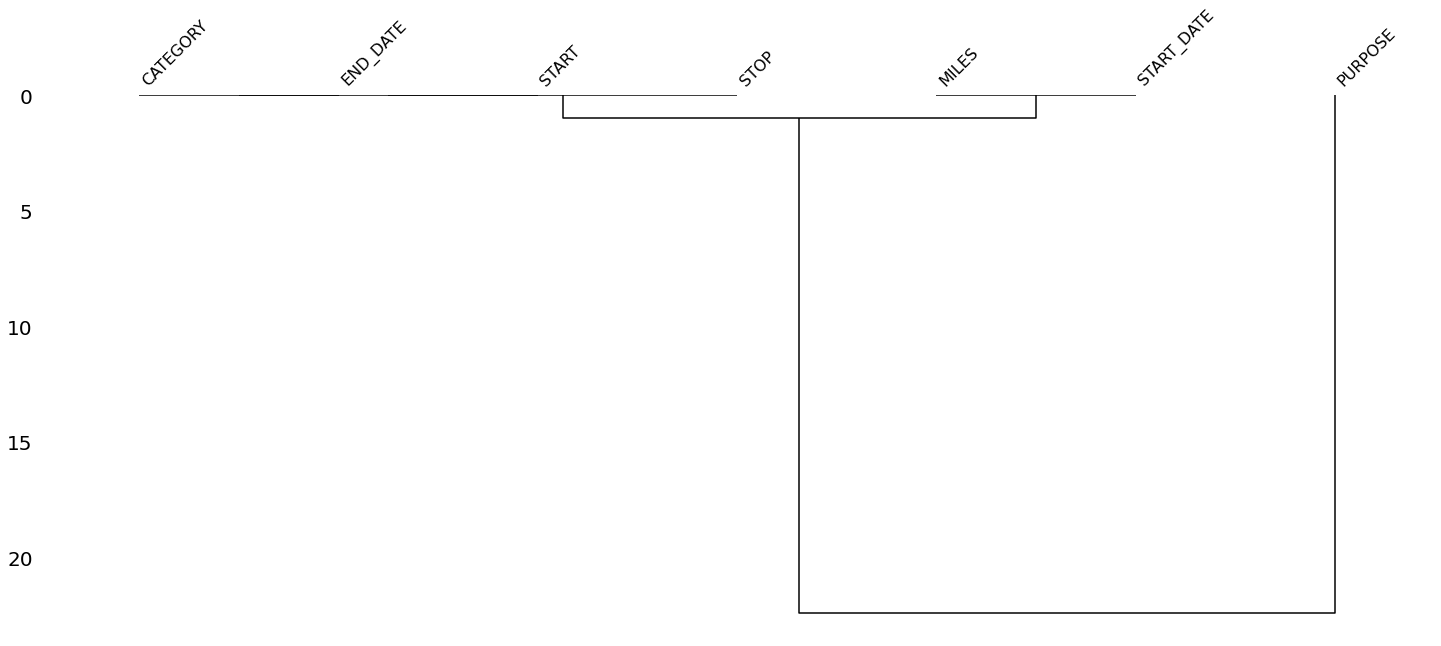

In [4]:
# Метод dendrogram из библиотеки missingno
msno.dendrogram(df)
plt.show()

In [5]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_df = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean().round(4)})
missing_df

,Кол-во пропусков,Доля пропусков
START_DATE,0,0.0000
END_DATE,1,0.0009
CATEGORY,1,0.0009
START,1,0.0009
STOP,1,0.0009
MILES,0,0.0000
PURPOSE,503,0.4351


In [6]:
# выводим сведения о типах данных
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

## Предобработка данных

### Смена типов данных

In [7]:
for column in ['START_DATE', 'END_DATE']:
    df[column] = pd.to_datetime(df[column], 
    format='%m-%d-%Y %H:%M', 
    errors='coerce').fillna(
    pd.to_datetime(df[column], 
        format='%m/%d/%Y %H:%M', 
        errors='coerce'))

In [8]:
# Выводим 30 первых строк
df.head(30)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


### Нормализация данных

In [9]:
# в столбцах 'START', 'STOP' заменим некорретные значения населенных пунктов
for column in ['START', 'STOP']:
    df[column] = df[column].replace({'Kar?chi': 'Karachi',
                                     'R?walpindi': 'Rawalpindi'})

### Удаление пропусков, дубликатов

In [10]:
# Проверим наличие пропусков после смены типов данных
missing_df = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean().round(4)})
missing_df

,Кол-во пропусков,Доля пропусков
START_DATE,1,0.0009
END_DATE,1,0.0009
CATEGORY,1,0.0009
START,1,0.0009
STOP,1,0.0009
MILES,0,0.0000
PURPOSE,503,0.4351


In [11]:
# Выводим последние 5 строк
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN


In [12]:
# удалим последнюю пустую строку, которая использовалась в исходном файле для подведения итогов по протяженности.
df = df[~(df['START_DATE'].isna())]
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [13]:
# удалим столбец 'PURPOSE', содержащий более 40% пропусков.
df = df.drop('PURPOSE', axis=1)

In [14]:
# Определим количество строк в датафрейме до удаления дубликатов
list_columns=df.columns.tolist()
initial_row_count = df.shape[0]
print(f'Количество строк до удаления дубликатов: {initial_row_count}')

# Найдите дублирующиеся строки
df_sorted = df.sort_values(by=list_columns)
duplicates = df[df.duplicated(subset=list_columns, keep=False)]
print("Дублирующиеся строки:")
print(duplicates)

# Удалите дублирующиеся строки
df = df.drop_duplicates(subset=list_columns)

# Определите количество строк в датафрейме после удаления дубликатов
final_row_count = df.shape[0]
print(f'Количество строк после удаления дубликатов: {final_row_count}')

Количество строк до удаления дубликатов: 1155
Дублирующиеся строки:
             START_DATE            END_DATE  CATEGORY   START  STOP  MILES
491 2016-06-28 23:34:00 2016-06-28 23:59:00  Business  Durham  Cary    9.9
492 2016-06-28 23:34:00 2016-06-28 23:59:00  Business  Durham  Cary    9.9
Количество строк после удаления дубликатов: 1154


## Итоги предобработки:

In [16]:
# выгрузим полученный файл для последующеего создания дашборта в FineBI 
df.to_excel(r"C:\Users\Mary\Downloads\UberDataset_new.xlsx", index=False)

Итоговый файл с учетом проведенной предобработки: удаления последней строки, дубликата, нормализации данных по дате и названиям пунктов отправления и назначения, содержит 1 154 строки, 6 столбцов: `START_DATE`, `END_DATE`, `CATEGORY`, `START`, `STOP`, `MILES`. 